In [1]:
%load_ext lab_black
import numpy as np
from sympy import symbols
from sympy.physics.continuum_mechanics import Beam

import matplotlib.pyplot as plt
import ajf_plts

plt.style.use(["./ajf_plts/base.mplstyle"])

In [2]:
E, I, L = symbols("E, I, L")
E = 30e9
I = 1
L = 20

In [98]:
x_load = np.linspace(0.0, L, 100)
RIL_LHS = []
RIL_RHS = []
for x in x_load:
    b = Beam(L, E, I)
    R_0, R_L = symbols('R_0, R_L')
    b.apply_load(R_0, 0, -1)
    b.apply_load(R_L, L, -1)
    b.apply_load(-1e3, x, -1)
    b.bc_deflection = [(0, 0), (L, 0)]
    b.solve_for_reaction_loads(R_0, R_L)
    RIL_LHS.append(b.slope().subs({'x':0.0}))
    RIL_RHS.append(b.slope().subs({'x':L}))

In [166]:
depth = 1.0
xc = 0.4
delta = 0.2
crack_height = delta * depth
lc = 1.5 * depth
I0 = 1
Ic = I0 * (depth - crack_height)**3.0 / depth**3.0
Ix = np.where(np.abs(x_load

SyntaxError: '(' was never closed (77250718.py, line 8)

ERROR:root:Cannot parse: 9:0: EOF in multi-line statement
Traceback (most recent call last):
  File "/home/ajf/ajf_conda_envs/python310/lib/python3.10/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/home/ajf/ajf_conda_envs/python310/lib/python3.10/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1131, in format_str
  File "src/black/__init__.py", line 1141, in _format_str_once
  File "src/black/parsing.py", line 128, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 9:0: EOF in multi-line statement


In [204]:
x_pos = np.linspace(0.0, L, 20)
depth = 1.0
xc = 0.4
delta = 0.5
crack_height = delta * depth
lc = 1.5 * depth
I0 = 1
Ic = I0 * (depth - crack_height) ** 3.0 / depth**3.0
Ix = np.where(np.abs(x_pos - xc) >= lc, I0, Ic + np.abs(x - xc) * (I0 - Ic) / lc)

In [207]:
RIL_LHS = []
RIL_RHS = []
LHS = []
RHS = []
for x in x_pos:
    b = Beam(L, E, I)
    R_0, R_L = symbols("R_0, R_L")
    b.apply_load(R_0, 0, -1)
    b.apply_load(R_L, L, -1)
    b.apply_load(-1e3, x, -1)
    b.bc_deflection = [(0, 0), (L, 0)]
    b.solve_for_reaction_loads(R_0, R_L)
    M = np.array([b.bending_moment().subs({"x": x_i}) for x_i in x_pos])
    # Get LHS rotation by integration
    # Integrating from 0.0 to x_load
    mask = x_pos <= x
    LHS.append(np.trapz(M[mask] / (E * Ix[mask]), x_pos[mask]))
    # Get RHS rotation by integrating from x_load to L
    mask = x <= x_pos
    RHS.append(np.trapz(M[mask] / (E * Ix[mask]), x_pos[mask][::-1]))
    # Check using sympy
    RIL_LHS.append(b.slope().subs({"x": 0.0}))
    RIL_RHS.append(b.slope().subs({"x": L}))

In [4]:
b = Beam(L, E, I)
R_0, R_L = symbols("R_0, R_L")
b.apply_load(R_0, 0, -1)
b.apply_load(R_L, L, -1)
b.apply_load(-1e3, L / 2.0, -1)
b.bc_deflection = [(0, 0), (L, 0)]
b.solve_for_reaction_loads(R_0, R_L)

In [7]:
from sympy import integrate

x = symbols("x")

LHS.append(integrate(b.bending_moment(), (x, 0, L / 2.0)) / (E * I))
RHS.append(integrate(b.bending_moment(), (x, L / 2.0, L)) / (E * I))

NameError: name 'LHS' is not defined

In [34]:
from sympy import exp, Abs

depth = 1.0
I0 = I
xc = 0.5 * L
delta = 0.0
Ic = I0 * (depth * (1.0 - delta)) ** 3.0 / depth**3.0
C = (I0 - Ic) / Ic
Ix = I0 / (1 + C * exp(-2.0 * 0.667 * Abs(x - xc) / depth))
print(Ix)

1


In [42]:
x_pos = np.linspace(0.0, L, 10)

RIL_LHS = []
RIL_RHS = []
LHS = []
RHS = []

for load_pos in x_pos:
    b = Beam(L, E, I)
    R_0, R_L = symbols("R_0, R_L")
    b.apply_load(R_0, 0, -1)
    b.apply_load(R_L, L, -1)
    b.apply_load(-1e3, load_pos, -1)
    b.bc_deflection = [(0, 0), (L, 0)]
    b.solve_for_reaction_loads(R_0, R_L)
    # Get LHS rotation by integration
    # Integrating from 0.0 to x_load
    LHS.append(integrate(b.bending_moment() / (E * Ix), (x, 0, load_pos)))
    # Get RHS rotation by integrating from x_load to L
    RHS.append(integrate(b.bending_moment() / (E * Ix), (x, L, load_pos)))
    # Check using sympy
    RIL_LHS.append(b.slope().subs({"x": 0.0}))
    RIL_RHS.append(b.slope().subs({"x": L}))

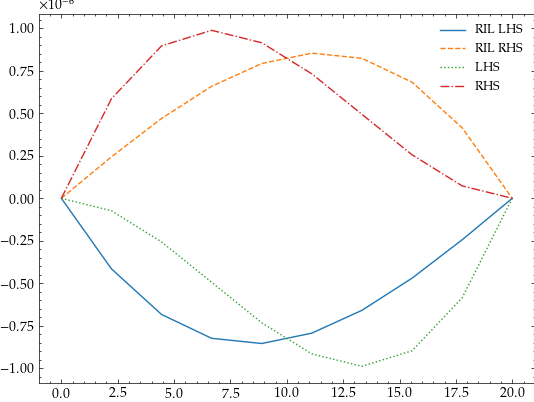

In [44]:
%matplotlib widget
plt.plot(x_pos, RIL_LHS, label="RIL LHS")
plt.plot(x_pos, RIL_RHS, label="RIL RHS")
plt.plot(x_pos, LHS, label="LHS")
plt.plot(x_pos, RHS, label="RHS")
plt.legend()

In [175]:
from sympy import *

# E_beam, I_beam, L_beam = symbols("E, I, L")
R_0, R_L = symbols("R_0, R_L")

E_beam = 30e9
I_beam = 1.0
L_beam = 20.0
P = -1e3  # 1kN

b = Beam(L_beam, E_beam, I_beam)
b.apply_load(R_0, 0, -1)
b.apply_load(R_L, L_beam, -1)
b.apply_load(P, 0.5 * L_beam, -1)
b.bc_deflection = [(0, 0), (L_beam, 0)]
b.solve_for_reaction_loads(R_0, R_L)

In [199]:
v_beam = symbols("v", cls=Function)

M_EI = b.bending_moment() / (E_beam * I_beam)

# for 0 to load_pos
integrate(M_EI)

-8.33333333333333e-9*SingularityFunction(x, 0, 2) + 1.66666666666667e-8*SingularityFunction(x, 10.0, 2) - 8.33333333333333e-9*SingularityFunction(x, 20.0, 2)

In [184]:
theta = symbols("theta", cls=Function)

In [185]:
slope_eq = Rel(theta(x).diff(x), b.bending_moment() / (E_beam * I_beam), "==")

In [186]:
dsolve(slope_eq)

Eq(theta(x), C1 - 8.33333333333335e-9*SingularityFunction(x, 0.0, 2.0) + 1.66666666666667e-8*SingularityFunction(x, 10.0, 2.0) - 8.33333333333335e-9*SingularityFunction(x, 20.0, 2.0))

In [193]:
disp_eq = Rel(
    integrate(theta(x)), integrate(b.bending_moment() / (E_beam * I_beam)), "=="
)

In [194]:
disp_eq

Eq(Integral(theta(x), x), -8.33333333333333e-9*SingularityFunction(x, 0, 2) + 1.66666666666667e-8*SingularityFunction(x, 10.0, 2) - 8.33333333333333e-9*SingularityFunction(x, 20.0, 2))

In [134]:
dsolve(slope_eq)

Eq(theta(x), C1 - 8.33333333333335e-9*SingularityFunction(x, 0.0, 2.0) + 1.66666666666667e-8*SingularityFunction(x, 10.0, 2.0) - 8.33333333333335e-9*SingularityFunction(x, 20.0, 2.0))

In [125]:
dsolve(diffeq, theta(x))

ValueError: 1.66666666666667e-8*SingularityFunction(x, 0, 1) - 3.33333333333333e-8*SingularityFunction(x, 10.0, 1) + 1.66666666666667e-8*SingularityFunction(x, 20.0, 1) + Derivative(v(x), x) is not a solvable differential equation in theta(x)

<function sympy.solvers.solvers.solve(f, *symbols, **flags)>

In [237]:
b.length

1.00000000000000

0

In [640]:
E_beam = 30e9
I_beam = 1.0
L_beam = 20.0
L_red = 0.1 * L_beam
I_red = (1.0 - 0.25) * I_beam
x_red = 0.5 * L_beam
P = -1e3  # kN


b_left = Beam(0.45 * L_beam, E_beam, I_beam)
b_mid = Beam(0.1 * L_beam, E_beam, 0.9 * I_beam)
b_right = Beam(0.45 * L_beam, E_beam, I_beam)
b = b_left.join(b_mid).join(b_right)
b.apply_support(0.0, "roller")
b.apply_support(b.length, "roller")
b.apply_load(R0, 0.0, -1)
b.apply_load(RL, b.length, -1)
b.solve_for_ild_reactions(1, R0, RL)
b.solve_for_ild_moment(0.5 * L, 1, R0, RL)

In [644]:
ild_moment = b.ild_moment.args[-1][0]

In [645]:
print(ild_moment)

0.5*x - 10.0


In [646]:
args = b.second_moment.args
slope = 0
prev_slope = 0
prev_end = 0
for i in range(len(args)):
    if i != 0:
        prev_end = args[i - 1][1].args[1]
    slope_value = -S.One / E * integrate( / args[i][0], (x, prev_end, x))
    if i != len(args) - 1:
        slope += (prev_slope + slope_value) * SingularityFunction(x, prev_end, 0) - (
            prev_slope + slope_value
        ) * SingularityFunction(x, args[i][1].args[1], 0)
    else:
        slope += (prev_slope + slope_value) * SingularityFunction(x, prev_end, 0)
    prev_slope = slope_value.subs(x, args[i][1].args[1])

SyntaxError: invalid syntax (1384585507.py, line 8)

ERROR:root:Cannot parse: 8:42:     slope_value = -S.One / E * integrate( / args[i][0], (x, prev_end, x))
Traceback (most recent call last):
  File "/home/ajf/ajf_conda_envs/python310/lib/python3.10/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/home/ajf/ajf_conda_envs/python310/lib/python3.10/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1131, in format_str
  File "src/black/__init__.py", line 1141, in _format_str_once
  File "src/black/parsing.py", line 128, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 8:42:     slope_value = -S.One / E * integrate( / args[i][0], (x, prev_end, x))


In [633]:
slope

(8.31808695996491e-22*x**2 - 3.3226873104771e-20*x - 3.68682204107588e-21)*SingularityFunction(x, 11.0, 0) - 3.33333333333333e-11*Piecewise((-2.49542608798947e-11*x**2 + 9.96806193143129e-10*x, x < 0), (2.77269565332164e-12*Min(9.0, x)**2 - 1.1075624368257e-10*Min(9.0, x) - 2.77269565332164e-11*Min(11.0, x)**2 + 1.1075624368257e-9*Min(11.0, x), x <= Min(11.0, x)), (nan, True))*SingularityFunction(x, 0, 0) + 3.33333333333333e-11*Piecewise((-2.49542608798947e-11*x**2 + 9.96806193143129e-10*x, x < 0), (2.77269565332164e-12*Min(9.0, x)**2 - 1.1075624368257e-10*Min(9.0, x) - 2.77269565332164e-11*Min(11.0, x)**2 + 1.1075624368257e-9*Min(11.0, x), x <= Min(11.0, x)), (nan, True))*SingularityFunction(x, 11.0, 0)

In [525]:
(S.NegativeOne * integrate(moment_eq / args[0][0], (x, 0.0, x))).args[-1].args

((0, x < 0), (555.555555555556*x**2 - 22222.2222222222*x, True))

In [545]:
slope = (
    S.NegativeOne
    / b.elastic_modulus
    * integrate(moment_eq / b.second_moment, (x, 0.0, x))
)

In [541]:
for arg in (moment_eq / b.second_moment).args:
    print(arg)

Piecewise((0, x < 0), (1000.0*x - 20000.0, x > 0))
Piecewise((1.11111111111111, x <= 10.0), (1.0, x <= 20.0))


In [501]:
slope.rewrite(Heaviside)

(5.55555555555556e-6 - 3.33333333333333e-11*Piecewise((-20000.0*x*Heaviside(x)*Heaviside(-x*Heaviside(x) + 10.0) + 50000.0*(0.1*x*Heaviside(x)*Heaviside(-x*Heaviside(x) + 10.0) + Heaviside(x*Heaviside(x) - 10.0))**2 - 200000.0*Heaviside(x*Heaviside(x) - 10.0) + 150000.0, x < 10.0), (nan, True)))*Heaviside(x - 10.0) - 3.33333333333333e-11*Piecewise((0, x < 0), (555.555555555556*x**2 - 22222.2222222222*x, True))*Heaviside(x) + 3.33333333333333e-11*Piecewise((0, x < 0), (555.555555555556*x**2 - 22222.2222222222*x, True))*Heaviside(x - 10.0)

In [631]:
x_vals = np.linspace(0.0, 20.0, 10)
LHS = [slope.subs(x, pos) for pos in x_vals]

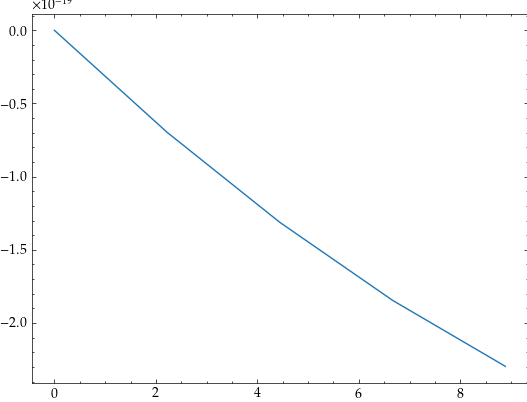

In [632]:
%matplotlib widget
plt.plot(x_vals, LHS)

In [483]:
[prev_slope.subs(x, pos) for pos in x_vals]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [487]:
slope_curve = S.NegativeOne * integrate(
    moment_eq / (b.elastic_modulus * b.second_moment)
)

In [488]:
slope_curve

-Piecewise((0, x < 0), (1.85185185185185e-8*x**2 - 7.40740740740741e-7*x, x <= 10.0), (1.66666666666667e-8*x**2 - 6.66666666666667e-7*x - 5.55555555555556e-7, x <= 20.0), (nan, True))

In [547]:
from sympy.utilities.lambdify import lambdify

func = lambdify(x, slope, "numpy")

In [548]:
%matplotlib widget
plt.plot(x_vals, func(x_vals))

/home/ajf/ajf_conda_envs/python310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [404]:
solution

[16666.6666666667 - 1666.66666666667*x,
 0,
 -1.0*R_0.0 - 100.0*x + 1000.0,
 -1.0*R_10.0000000000000 + 100.0*x]

In [399]:
linsolve([shear_curve, moment_curve] + slope_eqs + deflection_eqs, (C3, C4) + (R0, RL))

{(16666.6666666667 - 1666.66666666667*x, 0, -1.0*R_0.0 - 100.0*x + 1000.0, -1.0*R_10.0000000000000 + 100.0*x)}

In [377]:
slope_curve

C3 - R_0.0*SingularityFunction(x, 0.0, 2)/2 - R_10.0000000000000*SingularityFunction(x, 10.0, 2)/2

In [378]:
deflection_curve

C3*x + C4 - R_0.0*SingularityFunction(x, 0.0, 3)/6 - R_10.0000000000000*SingularityFunction(x, 10.0, 3)/6

In [361]:
x_pos = np.linspace(0.0, L_beam, 5)

RIL_LHS = []
RIL_RHS = []

for load_pos in x_pos:
    b = assemble_beam()
    b.apply_load(P, load_pos, -1)
    b.solve_for_reaction_loads(R_0, R_L)
    slope = b.slope()
    RIL_LHS.append(slope.subs({"x": 0.0}))
    RIL_RHS.append(slope.subs({"x": L_beam}))
    b.remove_load(P, load_pos, -1)

IndexError: tuple index out of range

In [333]:
b = assemble_beam()

b.apply_load(P, load_pos, -1)

b.solve_for_reaction_loads(R_0, R_L)

slope = b.slope()

RIL_LHS.append(slope.subs({"x": 0.0}))

RIL_RHS.append(slope.subs({"x": L_beam}))

b.remove_load(P, load_pos, -1)

In [334]:
b.length

20.0000000000000

In [246]:
b.second_moment

Piecewise((Piecewise((1.0, x <= 9.5), (0.25, x <= 10.5)), x <= 10.5), (1.0, x <= 20.0))

In [353]:
E_beam = 30e9
I_beam = 1.0
L_beam = 20.0
L_red = 0.1 * L_beam
I_red = (1.0 - 0.25) * I_beam
x_red = 0.5 * L_beam
P = -1e3  # kN


def assemble_beam():
    b_left = Beam(0.5 * L_beam, E_beam, 0.9 * I_beam)
    b_right = Beam(0.5 * L_beam, E_beam, I_beam)
    b = b_left.join(b_right)
    R_0, R_L = symbols("R_0, R_L")
    b.apply_load(R_0, 0, -1)
    b.apply_load(R_L, L_beam, -1)
    b.bc_deflection = [(0, 0), (L_beam, 0)]
    return b


x_pos = np.linspace(0.0, L_beam, 5)

RIL_LHS = []
RIL_RHS = []

for load_pos in x_pos:
    b = assemble_beam()
    b.apply_load(P, load_pos, -1)
    b.solve_for_reaction_loads(R_0, R_L)
    slope = b.slope()
    RIL_LHS.append(slope.subs({"x": 0.0}))
    RIL_RHS.append(slope.subs({"x": L_beam}))
    b.remove_load(P, load_pos, -1)

In [358]:
RIL_LHS

[nan, nan, nan, nan, 0]

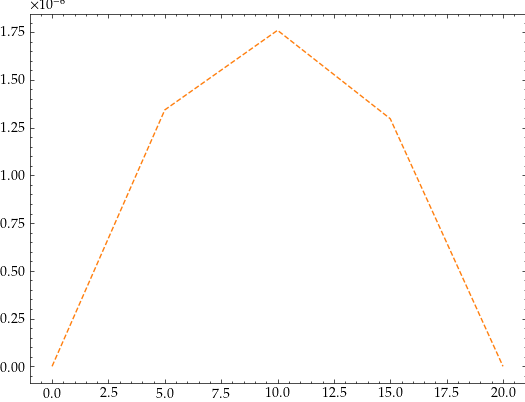

In [359]:
%matplotlib widget
plt.plot(x_pos, RIL_LHS, label="RIL LHS")
plt.plot(x_pos, RIL_RHS, label="RIL RHS")

In [207]:
P = -1e3  # 1kN
b.apply_load(R_0, 0, -1)
b.apply_load(R_L, L_beam, -1)
b.apply_load(P, 0.5 * L_beam, -1)
b.bc_deflection = [(0, 0), (L_beam, 0)]
b.solve_for_reaction_loads(R_0, R_L)

In [347]:
E_beam = 30e9
I_beam = 1.0
L_beam = 20.0
L_red = 0.1 * L_beam
I_red = (1.0 - 0.25) * I_beam
x_red = 0.5 * L_beam
P = -1e3  # kN


def assemble_beam():
    b_left = Beam(x_red - 0.5 * L_red, E_beam, I_beam)
    b_red = Beam(L_red, E_beam, 0.9 * I_beam)
    b_right = Beam(L_beam - (x_red + 0.5 * L_red), E_beam, I_beam)
    b = b_left.join(b_red).join(b_right)
    R_0, R_L = symbols("R_0, R_L")
    b.apply_load(R_0, 0, -1)
    b.apply_load(R_L, L_beam, -1)
    b.bc_deflection = [(0, 0), (L_beam, 0)]
    return b


x_pos = np.linspace(0.0, L_beam, 5)

RIL_LHS = []
RIL_RHS = []

for load_pos in x_pos:
    b = assemble_beam()
    b.apply_load(P, load_pos, -1)
    b.solve_for_reaction_loads(R_0, R_L)
    slope = b.slope()
    RIL_LHS.append(slope.subs({"x": 0.0}))
    RIL_RHS.append(slope.subs({"x": L_beam}))
    b.remove_load(P, load_pos, -1)

In [29]:
b.bending_moment().eval(x, 0)

AttributeError: 'Add' object has no attribute 'eval'

In [46]:
b.load

R_0*SingularityFunction(x, 0, -1) + R_L*SingularityFunction(x, 1, -1)